In [5]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/thempel/fustorage/projects/vha_auschwitz_report/')
import constants
import matplotlib.pyplot as plt
import pyemma
from tqdm.notebook import tqdm
from wordcloud import WordCloud

In [6]:
# Read the input data
input_directory = '../../'+constants.output_data_segment_keyword_matrix
# Read the column index (index terms) of the matrix above
features_df = pd.read_csv(input_directory + 
                          constants.output_segment_keyword_matrix_feature_index)

In [7]:
# re-load MSMs
msm_m = pyemma.load('../../data/output/markov_modelling/complete_m/pyemma_model',
                   model_name='simple')
msm_w = pyemma.load('../../data/output/markov_modelling/complete_w/pyemma_model',
                   model_name='simple')

In [10]:
# write stationary probabilities into a dictionary
# use a lower threshold for the stationary probabilities
p_thres = 1e-3

wfreqs_m, wfreqs_w = {}, {}

for state, p in zip(msm_m.active_set, msm_m.pi):
    if p > p_thres:
        key = features_df.iloc[state]['KeywordLabel']
        wfreqs_m[key] = p
        
for state, p in zip(msm_w.active_set, msm_w.pi):
    if p > p_thres:
        key = features_df.iloc[state]['KeywordLabel']
        wfreqs_w[key] = p

In [16]:
def black(word, font_size, position, orientation,
    font_path, random_state):
    return 'black'

def blue(word, font_size, position, orientation,
    font_path, random_state):
    return 'blue'

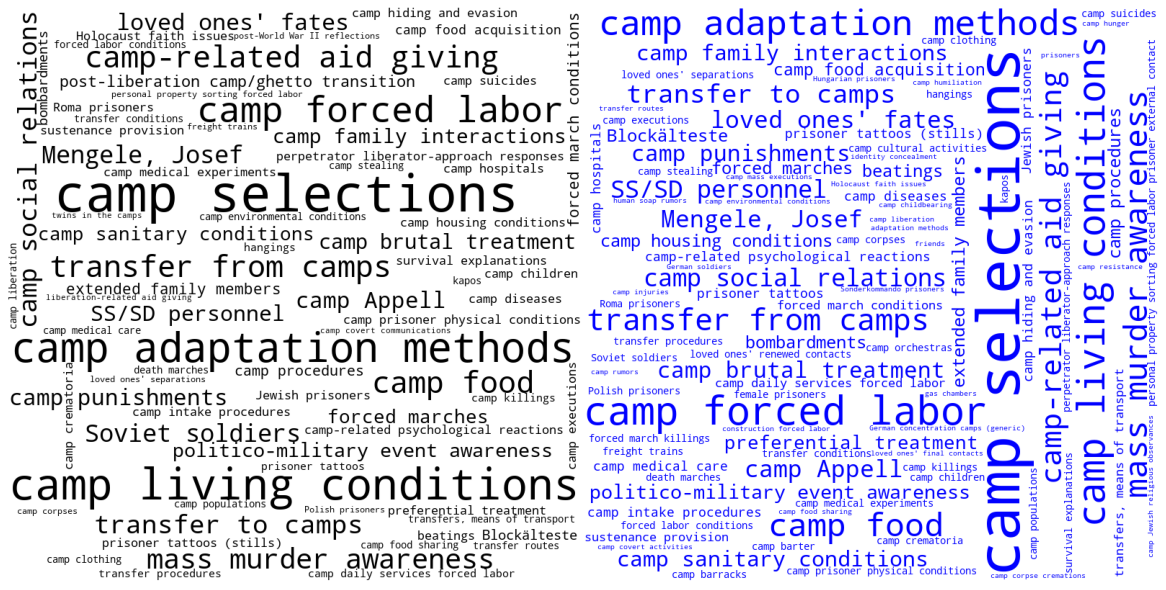

In [17]:
wordcloud_m = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=black,
                min_font_size = 10).generate_from_frequencies(wfreqs_m)
wordcloud_w = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=blue,
                min_font_size = 10).generate_from_frequencies(wfreqs_w)
  
# plot the WordCloud image
fig, ax = plt.subplots(1, 2, figsize=(16, 8), facecolor=None)
 
ax[0].imshow(wordcloud_m)
ax[1].imshow(wordcloud_w)
for _ax in ax:
    _ax.axis("off") 
plt.tight_layout(pad=0) 